# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Alejandra Toro
- Nombre de alumno 2: Martín Torrico

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/MartinTorricoP/Laboratorios_MDS7202)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. La principal diferencia entre los datos de entrenamiento y de validación es el propósito que tienen en el proceso de entrenar un modelo predictivo.

    Por un lado, los datos de entrenamiento son un subconjunto de datos (generalmente más grande que los de validación) que utiliza el modelo para "aprender", ajustando con ellos sus parámetros para poder realizar posteriormente una mejor predicción.
    
     Por otro lado, los datos de validación son un subconjunto de datos que se "apartan" del conjunto original para evaluar cómo aprendió nuestro modelo. Es importante que estos últimos no sean utilizados también en el entrenamiento, sino tendremos problemas de overfitting.

2. Si estamos trabajando con data no supervisada, quiere decir que no tenemos en nuestra base un atributo que nos indique la etiqueta correspondiente de cada entrada. Luego, para resolver un problema de clasificación, tendremos la dificultad de que no sabemos a ciencia cierta qué etiqueta debiese predecir la máquina, por lo que no podremos validar directamente su desempeño y con eso si estamos realizando una buena predicción.

3. Una matriz de confusión es una tabla donde hacemos un recuento de los casos donde nuestro modelo asigna correctamente o se equivoca en su predicción de la etiqueta vs el valor real que de una etiqueta. Los 4 cuadrantes son TP (True Positives), FP (False Positives), FN (False Negatives) y FP (True Negatives). Esta matriz se utiliza normalmente para para calcular métricas de desempeño de nuestro modelo (como accuracy, precision, recall o F1-score) y sirve para tener una primera visualización de su desempeño.

4. Las fórmulas de estas métricas son:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

$$\text{Precision} = \frac{TP}{TP + FP}$$

$$\text{Recall} = \frac{TP}{TP + FN}$$

$$F1 = \frac{2TP}{2TP + FP + FN} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

Donde:
- Accuracy es la proporción de predicciones que se realizaron correctamente (positivas y negativas) respecto al total de predicciones.

- Precision es la proporción de predicciones de los casos positivos que se realizaron correctamente entre todos los casos predichos como positivos.

- Recall es la proporción de casos positivos predichos entre todos los casos que realmente son positivos. Nos da una medida de qué tan bien estamos detectando los casos que sabemos son positivos.

- F1 score es una métrica que mide el balance entre precision y recall, sirve cuando queremos integrar ambas miradas en una sola métrica.

5. Para cada uno de los contextos se deciden las métricas de:
  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: Recall
  
    En este contexto, una falla imprevista de maquinaria pesada en la industria minera suena significativamente más perjudicial que una falsa alarma de una falla de la maquinaria, tanto por temas de seguridad en primer lugar como financieros. Luego, recomendamos utilizar Recall porque mide qué tan bien estamos prediciendo los casos positivos que es cuando realmente falla la maquinaria.
    
  * Detección de enfermedades altamente contagiosas: Recall

    Similar al caso anterior, se recomienda utilizar Recall ya que anunciar un falso positivo es un mal menor, ya que la persona no sufre realmente de esta enfermedad contagiosa y no es relamente un peligro para sí ni el resto, sin embargo, dejar pasar un falso negativo en el diagnóstico significa que esta persona pensará que no es un vector contagioso perjudicandose a sí mismo y al resto.

  * Aprobación de créditos de alto riesgo: Precision

    En este caso, a la entidad financiera le interesa evitar aprobar un crédito de alto riesgo a un cliente que no lo merezca más allá de no entregarle un crédito a alguien que en realidad si podía merecerlo. Es por esto que aquí el mal menor es un falso negativo y no un falso positivo, por lo que se prefiere recomendar la métrica de Precision.

  * Detección de crímenes: F1-score
  
    Por último, en este contexto nos podría interesar evitar tanto falsos positivos (acusar como criminal a alguien inocoente) como los falsos negativos (declarar inocente a alguien criminal). No es tan directo como en los otros casos cuál de los 2 falsos queremos evitar más que el otro, por lo que se recomienda en este caso usar la métrica de F1-score la cual nos entrega el balance entre precision y recall.

6. La calibración de modelos es un proceso de ajustar los parámetros de un modelo predictivo para que las probabilidades estimadas se reflejen de mejor manera en las probabilidades reales que se observan en los datos. La calibración se utiliza para corregir el sesgo de las probabilidades que entrega el modelo, por ejemplo para corregir probablidades que se encuentren fuera del rango entre 0 y 1.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Librerías del laboratorio:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:
df_players = pd.read_csv('stats_players.csv')
display(df_players.head())

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


In [4]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Position      17587 non-null  object
 4   Height             17588 non-null  int64 
 5   Weight             17588 non-null  int64 
 6   Preffered_Foot     17588 non-null  object
 7   Age                17588 non-null  int64 
 8   Work_Rate          17588 non-null  object
 9   Weak_foot          17588 non-null  int64 
 10  Skill_Moves        17588 non-null  int64 
 11  Ball_Control       17588 non-null  int64 
 12  Dribbling          17588 non-null  int64 
 13  Marking            17588 non-null  int64 
 14  Sliding_Tackle     17588 non-null  int64 
 15  Standing_Tackle    17588 non-null  int64 
 16  Aggression         17588 non-null  int64

In [5]:
# 1
mask = df_players['National_Position'].isna()
df_players['label'] = mask.apply(lambda x: 1 if x == False else 0)
df_players['label'].value_counts()

,count
label,
0,16513
1,1075


Respuesta: Es posible ver un desbalance en las etiquetas, ya que la mayoia de los jugadores no son seleccionados nacionales.

In [6]:
# 2

col_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'), ['Club_Position', 'Preffered_Foot', 'Work_Rate', 'Nationality']),
        ('StandardScaler', StandardScaler(),
         ['Height', 'Weight', 'Age',
          'Ball_Control', 'Dribbling',
          'Marking', 'Sliding_Tackle', 'Standing_Tackle',
          'Aggression', 'Reactions', 'Interceptions', 'Vision',
          'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
          'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
          'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
          'Freekick_Accuracy', 'Penalties', 'Volleys']),
        ('MinMaxScaler', MinMaxScaler(), ['Weak_foot', 'Skill_Moves'])
    ],
)


**Respuesta:**

Las justificaciones del preprocesamiento a utilizar sobre cada columna son: Se eliminaran las columnas de:

- Name: dado que el nombre no debería tener influencia en si es seleccionado o no.
- National_Position: dado que fue utilizado para crear el label.


Se hará un OneHotEncoding a las columnas de:

- Club_position: dado que para las distintas posiciones son distintos stats los que importan, lo cual debe tomar en consideración el modelo.
- Preffered_Foot: dado que es importante saber que pie utiliza para patiar y relacionarlo con la posición.
- Work_Rate: dado que es importante poseer el ratio de trabajo que tiene. Se podría pasar a ordinal pero esta complejo dado que considera la relación de 2 ratios.
- Nationality: dado que para ver si un jugador es seleccionado nacional es útil saber su nacionalidad.

Se hara una estandarización sobre las siguientes columnas dado a que siguen una distribución ajustable a una normal:

- Height
- Weight
- Age
- Ball_Control
- Dribbling
- Marking
- Sliding_Tackle
- Standing_Tackle
- Aggression
- Reactions
- Interceptions
- Vision
- Composure
- Crossing
- Short_Pass
- Long_Pass
- Acceleration
- Speed
- Stamina
- Strength
- Balance
- Agility
- Jumping
- Heading
- Shot_Power
- Finishing
- Long_Shots
- Curve
- Freekick_Accuracy
- Penalties
- Volleys

Se hara una escalamiento de mínimo y máximo sobre las siguientes columnas dado que poseen sus límites bien definidos:

- Weak_foot
- Skill_Moves

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df_players.drop(["label", "National_Position", "Name"], axis=1), df_players.label, test_size=0.33, shuffle=True, stratify=df_players.label
)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11783, 37)
(11783,)
(5805, 37)
(5805,)


In [9]:
print('Distribución conjunto original')
display(df_players.label.value_counts() / df_players.label.count() * 100)
print('\n')
print('Distribución conjunto de entenamiento')
display(y_train.value_counts()/y_train.count()*100)
print('\n')
print('Distribución conjuto de prueba')
display(y_test.value_counts() / y_test.count() * 100)


Distribución conjunto original


,count
label,
0,93.887878
1,6.112122




Distribución conjunto de entenamiento


,count
label,
0,93.889502
1,6.110498




Distribución conjuto de prueba


,count
label,
0,93.884582
1,6.115418


In [10]:
# 2
# `pipeline_xgboost`
pipeline_xgboost = Pipeline(
    [
        ("preprocesamiento", col_transformer),
        ("xgboost", XGBClassifier())
    ]
)
# `pipeline_lightgbm`
pipeline_lightgbm = Pipeline(
    [
        ("preprocesamiento", col_transformer),
        ("xgboost", LGBMClassifier())
    ]
)


In [11]:
# 3 entrenamiento
pipeline_xgboost = pipeline_xgboost.fit(X_train, y_train)
pipeline_xgboost

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate',
                                                   'Nationality']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interc...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [12]:
pipeline_lightgbm = pipeline_lightgbm.fit(X_train, y_train)
pipeline_lightgbm

[LightGBM] [Info] Number of positive: 720, number of negative: 11063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2658
[LightGBM] [Info] Number of data points in the train set: 11783, number of used features: 138
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061105 -> initscore=-2.732110
[LightGBM] [Info] Start training from score -2.732110


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate',
                                                   'Nationality']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', ...]),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Weak_foot',
                                                   'Skill_Moves'])])),
                ('xgboost', LGBMClassifier())])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [13]:
# predicciones
y_pred_xgb = pipeline_xgboost.predict(X_test)
y_pred_lgb = pipeline_lightgbm.predict(X_test)

In [14]:
# 1
# XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb,)
precision_xgb = precision_score(y_test, y_pred_xgb, pos_label=1)
recall_xgb = recall_score(y_test, y_pred_xgb, pos_label=1)

# LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb, pos_label=1)
recall_lgb = recall_score(y_test, y_pred_lgb, pos_label=1)


In [15]:
# Imprimir los resultados
print("XGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}\n")

print("LightGBM Metrics:")
print(f"Accuracy: {accuracy_lgb}")
print(f"Precision: {precision_lgb}")
print(f"Recall: {recall_lgb}\n")


XGBoost Metrics:
Accuracy: 0.9490094745908699
Precision: 0.656084656084656
Recall: 0.3492957746478873

LightGBM Metrics:
Accuracy: 0.9496985357450474
Precision: 0.7006369426751592
Recall: 0.30985915492957744



In [16]:
# 2

print("Classification Report XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Seleccionado', 'Seleccionado']))

print("Classification Report LightGBM:")
print(classification_report(y_test, y_pred_lgb, target_names=['No Seleccionado', 'Seleccionado']))

Classification Report XGBoost:
                 precision    recall  f1-score   support

No Seleccionado       0.96      0.99      0.97      5450
   Seleccionado       0.66      0.35      0.46       355

       accuracy                           0.95      5805
      macro avg       0.81      0.67      0.71      5805
   weighted avg       0.94      0.95      0.94      5805

Classification Report LightGBM:
                 precision    recall  f1-score   support

No Seleccionado       0.96      0.99      0.97      5450
   Seleccionado       0.70      0.31      0.43       355

       accuracy                           0.95      5805
      macro avg       0.83      0.65      0.70      5805
   weighted avg       0.94      0.95      0.94      5805



2) La cantidad de ejemplos si influye, la clase mayoritaria (correspondiente a no ser un seleccionado), fue la que obtuvo mejores métricas tanto en precision como en recall, lo que nos dice que todos los modelos, dado que esta clase poseía muchos más datos que la otra, se sobre ajustaron para predecir a los no seleccionados. Esto también es un punto de mejora de los resultados, dado que mediante técnicas como hacer OverSampling, UnderSamplig o darle pesos a las clases al momento de entrenar el modelo se puede corregir este sobreajuste a la clase mayoritaria.

3) Métrica más adecuada:
   
   En este caso, dado que la clase positiva (jugadores seleccionados) es la más importante y es la minoritaria, el recall y el f1-score son métricas más importantes que la accuracy. El recall te indica qué porcentaje de los jugadores seleccionados fueron identificados correctamente, lo cual es importante si no queremos dejar fuera de nuestra predicción jugadores seleccionados. El f1-score también es interesante porque ayudaría a equilibrar el balance entre precisión y recall.

   Conclusión sobre el mejor modelo:

   Ambos modelos tienen desempeños similares, sin embargo XGBoost tiene un mejor desempeño en términos de recall (35% vs 31%), lo que significa que XGBoost es mejor a la hora de identificar a más jugadores seleccionados, siendo consecuentes con el punto anterior. XGBoost también tiene un f1-score ligeramente mejor para la clase seleccionada (45% vs 42%), lo que sugiere que balancea mejor la precisión y el recall que LightGBM.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [17]:
#1
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

# Creamos la categorías
df_players['Categoria'] = df_players['Club_Position'].apply(
    lambda x: 'ataque' if x in ataque else
              'central_ataque' if x in central_ataque else
              'central' if x in central else
              'central_defensa' if x in central_defensa else
              'defensa' if x in defensa else
              'arquero' if x in arquero else 'otra'
)

# Quitamos los casos que no están dentro de ataque, central_ataque, central, central_defensa, defensa o arquero.
df = df_players[df_players['Categoria'] != 'otra']

In [18]:
#2
conteo_clases = df['Categoria'].value_counts()

# Mostrar el conteo
conteo_clases

,count
Categoria,
defensa,1180
central,907
arquero,632
central_ataque,581
ataque,430
central_defensa,209


In [19]:
#3
col_transformer2 = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'), ['National_Position','Preffered_Foot', 'Work_Rate', 'Nationality']),
        ('StandardScaler', StandardScaler(),
         ['Height', 'Weight', 'Age',
          'Ball_Control', 'Dribbling',
          'Marking', 'Sliding_Tackle', 'Standing_Tackle',
          'Aggression', 'Reactions', 'Interceptions', 'Vision',
          'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
          'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
          'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
          'Freekick_Accuracy', 'Penalties', 'Volleys']),
        ('MinMaxScaler', MinMaxScaler(), ['Weak_foot', 'Skill_Moves'])
    ],
    sparse_threshold=0  # Asegura que las matrices sean densas para Naive Bayes
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["Categoria", "Club_Position", "Name"], axis=1), df.Categoria, test_size=0.33, shuffle=True, stratify=df.Categoria
)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2639, 38)
(2639,)
(1300, 38)
(1300,)


In [22]:
print('Distribución conjunto original')
display(df.Categoria.value_counts() / df.Categoria.count() * 100)
print('\n')
print('Distribución conjunto de entenamiento')
display(y_train.value_counts()/y_train.count()*100)
print('\n')
print('Distribución conjuto de prueba')
display(y_test.value_counts() / y_test.count() * 100)


Distribución conjunto original


,count
Categoria,
defensa,29.956842
central,23.026149
arquero,16.044681
central_ataque,14.749937
ataque,10.916476
central_defensa,5.305915




Distribución conjunto de entenamiento


,count
Categoria,
defensa,29.973475
central,23.039030
arquero,16.028799
central_ataque,14.740432
ataque,10.913225
central_defensa,5.305040




Distribución conjuto de prueba


,count
Categoria,
defensa,29.923077
central,23.000000
arquero,16.076923
central_ataque,14.769231
ataque,10.923077
central_defensa,5.307692


In [23]:
# Definir el pipeline con Naive Bayes
pipeline_naive_bayes = Pipeline(
    [
        ("preprocesamiento", col_transformer2),
        ("naive_bayes", GaussianNB())
    ]
)

In [24]:
# Entrenar el pipeline con los datos de entrenamiento
pipeline_naive_bayes = pipeline_naive_bayes.fit(X_train, y_train)
pipeline_naive_bayes

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['National_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate',
                                                   'Nationality']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', ...]),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Weak_foot',
                                                   'Skill_Moves'])])),
                ('naive_bayes', GaussianNB())])

In [25]:
y_pred_naive_bayes = pipeline_naive_bayes.predict(X_test)

In [26]:
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes, average=None)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes, average=None)

In [27]:
# Imprimir los resultados
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_naive_bayes}")
print(f"Precision: {precision_naive_bayes}")
print(f"Recall: {recall_naive_bayes}")

Naive Bayes Metrics:
Accuracy: 0.25076923076923074
Precision: [1.         0.39759036 0.33333333 0.36363636 0.0655914  0.38888889]
Recall: [0.96172249 0.23239437 0.02675585 0.08333333 0.88405797 0.01799486]


**Respuesta:**
Sobre los resultados de esta clasificación, en cuanto a precision se puede ver que para todos los modelos implementados la clase más fácil de clasificar es la de arquero, esto se puede deber a que resulta ser la posición más apartada del resto en cuanto a características de juego lo cual podría tener una inferencia directa por sobre las características físicas de los jugadores. Se debe tener ojo también en un posible sobreajuste dentro de esta variable al obtener métricas prácticamente perfectas.

Otro comentario relevante puede ser el hecho de que las clases se encuentran sumamente desbalanceadas, por ejemplo la diferencia entre la clase mayoritaria y la clase minoritaria es de 1180 vs 209 respectivamente influyendo de manera directa en el aprendizaje del modelo, lo cual se refleja en las métricas de precision, recall y f1-score. En este sentido, al ver tan buenos resultados en las métricas sobre la clase mayoritaria también se podría mencionar la presencia de un sobre entrenamiento del modelo sobre esta posición.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [28]:
# !pip install pycaret[full]

In [29]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

#Continuar código aquí
clf = setup(data=df_players, target='label',
            ignore_features=['Name', 'Nationality', 'National_Position', 'Club_Position'], session_id=42)

models = compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'],
                        sort='F1',
                        turbo=True)

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 41)"
4,Transformed data shape,"(17588, 51)"
5,Transformed train set shape,"(12311, 51)"
6,Transformed test set shape,"(5277, 51)"
7,Ignore features,4
8,Numeric features,33
9,Categorical features,3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8903,0.5692,0.2034,0.1719,0.1858,0.1277,0.1284,0.5880
xgboost,Extreme Gradient Boosting,0.9357,0.7836,0.1144,0.4194,0.1779,0.1556,0.1927,0.6900
lightgbm,Light Gradient Boosting Machine,0.9395,0.7918,0.1037,0.5239,0.1722,0.1553,0.2128,2.1270
catboost,CatBoost Classifier,0.9405,0.8033,0.0957,0.5742,0.1633,0.1486,0.2163,12.5130
rf,Random Forest Classifier,0.9412,0.7906,0.0731,0.6780,0.1306,0.1203,0.2066,3.4760
et,Extra Trees Classifier,0.9404,0.7918,0.0465,0.7259,0.0863,0.0792,0.1680,2.3230


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

**Respuesta:**


*   DT (Decision Tree): es un modelo de clasificacon que divide los datos en subconjuntos basandose en condiciones en las caracteristicas de los datos. Cada nodo del arbol representa una condicion y las ramas son los resultados. El proceso de dividir los datos finaliza cuando un subconjunto contiene mayormente una unica clase o hasta alcanzar una profundidad maxima.
*   RF (Random Forest): es un modelo que es un conjunto de muchos arboles de decision entrenados con diferentes subconjuntos de datos y caracteristicas. Cada arbol hace una prediccion y la prediccion final se basa en el promedio o el voto mayoritario de los arboles (dependiendo si es una tarea de regresion o clasificacion).
* ET (Extra Trees): es un modelo similar al random forest, pero presenta mas aleatoriedad en la creacion de los arboles, ya que, en vez de elegir las divisiones optimas en cada nodo, las divisiones se seleccionan de manera aleatoria, lo que tiende a reducir la varianza del modelo y por lo tanto poder mejorar la capacidad de generalizacion.



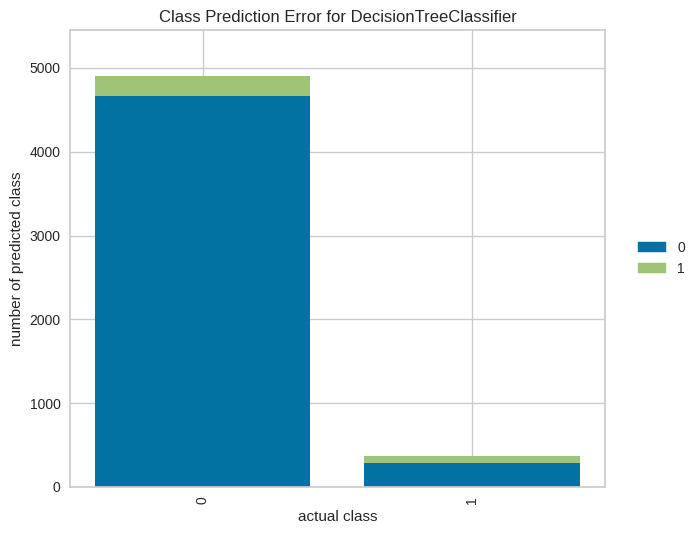

In [30]:
# mejor modelo
# Evaluar el mejor modelo
best_model = models
plot_model(best_model, plot='error')

In [31]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Respuesta:**

En terminos de velocidad y reduccion de falsos positivos, el mejor modelo a elegir seria el Random Forest pues tiene una alta precision (0.678) y una baja tasa de falsos positivos, con un tiempo de ejecucion de 4 segundos aproximadamente, o tambien podria ser el Extra Trees, ya que tambien presenta una alta presicion (0.7259) pero con un recall muy bajo (0.0465), lo que quizas significa que no seleccionara a muchos jugadores.

* Matriz de confsion: El modelo tiene una tasa muy alta de VN (4669), pero su tasa de VP es mucho menor (86), lo que indica que el modelo tiene grandes dificultades para identificar a los jugadores seleccionados.
* Theshold: El umbral por defecto es 0.5 (linea punteada), el cual puede no ser el mejor ya que la presicion y el recall tienden a mejorar con un imbral mas bajo (0.3 o menos), pero esto podria aumentar los falsos positivos.
* Feature Importance: La variable mas importante es Reactions, despues Interceptions, Stamina, Weight y Heading. Reactions puede ser relevante para predecir el rendimiento del equipo nacional, ya que la capacidad de reaccionar rapido es crucial en el futbol. Las otras caracteristicas pueden influir en el desempeño fisicio de los jugadores, lo que tambien es un punto muy importante en la seleccion.
* Learning Curve: Como se puede observar en el grafico, el modelo presenta overfitting, ya que el training score es una linea recta con un score de 1.0, mientras que la curva de cross validation es significativamente menor y tambien tiende a ser recta, lo que indica que el modelo no generaliza los datos nuevos.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [48]:
import xgboost as xgb

X = df_players.drop(columns=['label'])
y = df_players['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', col_transformer),
                           ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))])

pipeline.fit(X_train, y_train)

# eval
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4968
           1       0.62      0.39      0.48       309

    accuracy                           0.95      5277
   macro avg       0.79      0.69      0.73      5277
weighted avg       0.94      0.95      0.94      5277



In [33]:
import plotly.express as px

In [49]:
encoded_features = pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_importances = pipeline.named_steps['classifier'].feature_importances_

feature_importances_df = pd.DataFrame({'Feature': encoded_features, 'Importance': feature_importances})

# ordenar
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
display(feature_importances_df)

fig = px.bar(feature_importances_df, x='Importance', y='Feature', orientation='h',
             title='Importancia de las Características', labels={'Importance':'Importancia', 'Feature':'Características'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


,Feature,Importance
204,StandardScaler__Reactions,0.034874
69,OneHotEncoder__Nationality_China PR,0.027471
84,OneHotEncoder__Nationality_Egypt,0.027193
155,OneHotEncoder__Nationality_Peru,0.025221
79,OneHotEncoder__Nationality_Czech Republic,0.024702
...,...,...
135,OneHotEncoder__Nationality_Mauritania,0.000000
134,OneHotEncoder__Nationality_Malta,0.000000
132,OneHotEncoder__Nationality_Madagascar,0.000000
131,OneHotEncoder__Nationality_Luxembourg,0.000000


In [50]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff

In [93]:
# eliminacion recursiva
estimator = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)
feature_names_transformed = col_transformer.get_feature_names_out()

selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train_transformed, y_train)

selected_features_transformed = feature_names_transformed[selector.support_]

X_train_reduced = selector.transform(X_train_transformed)
X_test_reduced = selector.transform(X_test_transformed)


#rfe_pipeline = Pipeline(steps=[('preprocessor', col_transformer),
#                               ('rfe', RFE(estimator, n_features_to_select=10, step=1)),
#                               ('classifier', estimator)])
#
#rfe_pipeline.fit(X_train, y_train)
#
## eval
#y_pred_rfe = rfe_pipeline.predict(X_test)
#print(classification_report(y_test, y_pred_rfe))

In [94]:
# modelo con caracteristicas seleccionadas
xgb_model_reduced = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = xgb_model_reduced.predict(X_test_reduced)

print(classification_report(y_test, y_pred_reduced))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4968
           1       0.60      0.11      0.19       309

    accuracy                           0.94      5277
   macro avg       0.77      0.55      0.58      5277
weighted avg       0.93      0.94      0.92      5277



In [95]:
cm = confusion_matrix(y_test, y_pred_reduced)

fig = ff.create_annotated_heatmap(cm, x=['Predicción 0', 'Predicción 1'], y=['Clase 0', 'Clase 1'],
                                  colorscale='Viridis', showscale=True)

fig.update_layout(title_text='Matriz de Confusión', xaxis_title='Predicción', yaxis_title='Clase Verdadera')
fig.show()

**Respuesta:**

* ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  * En terminos de accuracy es similar al modelo original (0.94 vs 0.95), pero hay una disminucion en la capacidad de manejar la clase minoritaria. El recall del modelo con caracteristicas reducidas es mucho mas bajo (0.11 vs 0.39), lo que indica que el modelo reducido no captura bien los VP de la clase 1. El f1-score tambien baja mucho en comparacion al modelo original. En general el modelo tiene un rendimiento peor en la prediccion de la clase 1, lo que lo hace menos robusto para datos desbalanceados.
* ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  * Al reducir las variables se simplifica el modelo, lo que lo hace mucho menos pesado y reduce el tiempo de entrenamiento. Tambien mejora en la capcidad de generalizacion, ya que se reduce el riesgo de sobreajuste. Sin embargo, en este caso, la eiminacion de las caracteristicas ha afectado significativamente en la capacidad de generalizacion de la clase minoritaria.
* Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]
  * Un modelo con menos caracteristicas es mas facil de explicar, ya que posee menos dependencias que evaluar, ya que es mas facil ver las variables que impactan en las predicciones, y tambien se elimina el ruido de las caracteristicas menos importantes.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [118]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Brier Score antes de la calibración
y_prob_before = pipeline.named_steps['classifier'].predict_proba(X_test_transformed)[:, 1]
brier_before = brier_score_loss(y_test, y_prob_before)
print(f'Brier Score antes de la calibración: {brier_before:.4f}')

# Calibramos con sigmoid
calibrated_model_sigmoid = CalibratedClassifierCV(method='sigmoid')
calibrated_model_sigmoid.fit(X_train_transformed, y_train)
y_prob_after_sigmoid = calibrated_model_sigmoid.predict_proba(X_test_transformed)[:, 1]

# Brier Score después de la calibración sigmoide
brier_after_sigmoid = brier_score_loss(y_test, y_prob_after_sigmoid)
print(f'Brier Score después de la calibración sigmoide: {brier_after_sigmoid:.4f}')

Brier Score antes de la calibración: 0.0364
Brier Score después de la calibración sigmoide: 0.0344


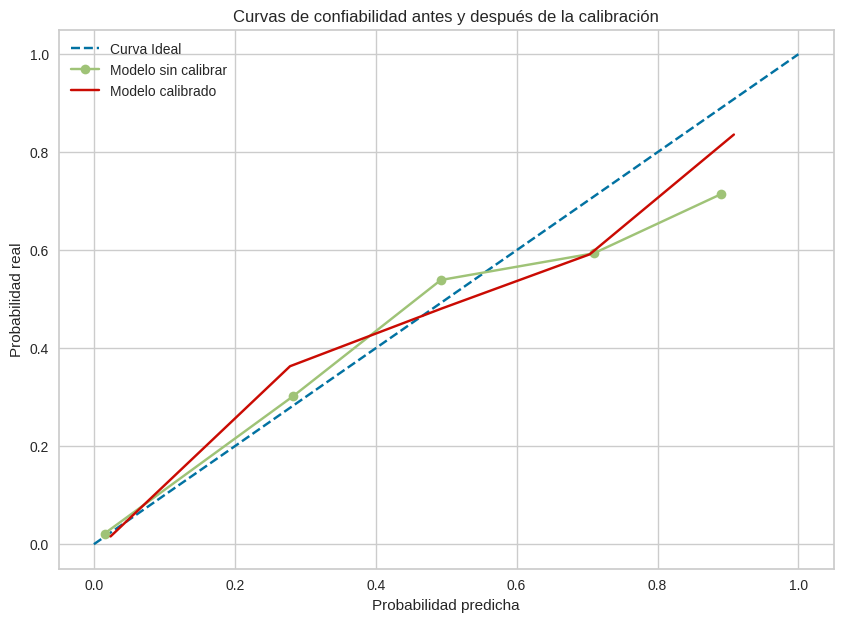

In [120]:
# Graficamos curvas de confiabilidad
prob_true_before, prob_pred_before = calibration_curve(y_test, y_prob_before)
prob_true_after_sigmoid, prob_pred_after_sigmoid = calibration_curve(y_test, y_prob_after_sigmoid)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], linestyle='--', label="Curva Ideal") #curva ideal
plt.plot(prob_pred_before, prob_true_before, marker='o', label="Modelo sin calibrar") #sin calibrar
plt.plot(prob_pred_after_sigmoid, prob_true_after_sigmoid, marker='x', label="Modelo calibrado") #sigmoide
plt.xlabel("Probabilidad predicha")
plt.ylabel("Probabilidad real")
plt.title("Curvas de confiabilidad antes y después de la calibración")
plt.legend()
plt.grid(True)
plt.show()

Se puede observar que después de la calibración, el Brier Score bajó de 0.0364 a 0.0344, lo que refleja una mejora en la precisión de las probabilidades predichas.

Gráficamente, podemos notar esta mejoría en que después de la calibración el modelo se ajusta mejor a la curva ideal, especialmente en las probabilidades más cercanas a 1, logrando una mayor similitud entre las probabilidades predichas y las reales.
